In [5]:
%matplotlib

Channels marked as bad: none
Using matplotlib backend: MacOSX


In [6]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from pathlib import Path
import re
import eelbrain


# The full process of ICA with downsample 
root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic')
eeg_data_path = root_data_path / "Experiments_Results/EEG"

sub_idSTR_LIST = ["001", "002", "003", "004-2", "005"]
#sub_idSTR_LIST = ["006_Alice_S002_2nd", "007_Alice_S001_2nd", "008_Alice"]
ICA_cLIST = [[0,5], [0, 1, 2, 4], [0, 8, 14], [3, 4, 5, 6, 7], [0, 8]]  # S001-005
#ICA_cLIST = [[0,2], [0,2], [0,1]]

for sub_idINT in sub_idSTR_LIST:
    #sub_idINT = 5

    cntFile = eeg_data_path / Path('S%s_Alice.cnt' %sub_idINT)  #'S001_Alice.cnt'  

    raw = mne.io.read_raw_cnt(cntFile)
    raw.load_data()
    # filter and exclude certain channels
    n_raw = raw.copy()
    n_raw.resample(sfreq=100)
    #n_raw.filter(0, 30, phase= 'zero-double')  # 再加0.1~30** / 1~30(訊號被扭曲的機率會更大) ，再重跑ICA
    n_raw.set_eeg_reference(['M1', 'M2'])
    n_raw.pick_types(eeg=True, stim=False, exclude=['M1', 'M2', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'HEOG', 'VEOG'])
                                                     # 'VEO', 'HEO', 'Audio' >> new layouts  #'HEOG', 'VEOG'
    
    # set montage????? yes!!!
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
    n_raw.set_montage(ten_twenty_montage, match_case=False)

    # ICA
    ica_ = ICA(n_components=15, random_state=97)
    ica_.fit(n_raw)
    
    c_index = sub_idSTR_LIST.index(sub_idINT)
    # apply the cleaned ICA to the data 
    ica_.exclude = ICA_cLIST[c_index]

    raw_ICAed = n_raw.copy()
    ica_.apply(raw_ICAed)
    #raw_ICAed.plot()

    # Save the ICAed data into fif file
    raw_ICAed.save(eeg_data_path/Path('S%s_sfreq-100-no-filter_ICAed_raw.fif' %sub_idINT), overwrite=True)

Extracting SQD Parameters from /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/de009-1.con...
Creating Raw.info structure...
Setting channel info structure...
Creating Info structure...
Reading 0 ... 2514999  =      0.000 ...  2514.999 secs...
Ready.
<Info | 9 non-empty values
 bads: []
 ch_names: MEG 001, MEG 002, MEG 003, MEG 004, MEG 005, MEG 006, MEG 007, ...
 chs: 157 Magnetometers, 3 Reference Magnetometers, 32 EEG, 64 misc, 1 Stimulus
 custom_ref_applied: False
 description: Academia Sinica/Institute of Linguistics//Magnetoencephalograph ...
 highpass: 0.0 Hz
 kit_system_id: 261 (Academia Sinica, 2008-)
 lowpass: 100.0 Hz
 meas_date: 2022-12-05 18:51:33 UTC
 nchan: 257
 projs: []
 sfreq: 1000.0 Hz
>
['MEG 001', 'MEG 002', 'MEG 003', 'MEG 004', 'MEG 005', 'MEG 006', 'MEG 007', 'MEG 008', 'MEG 009', 'MEG 010', 'MEG 011', 'MEG 012', 'MEG 013', 'MEG 014', 'MEG 015', 'MEG 016', 'MEG 017', 'MEG 018', 'MEG 019', 'MEG 020'

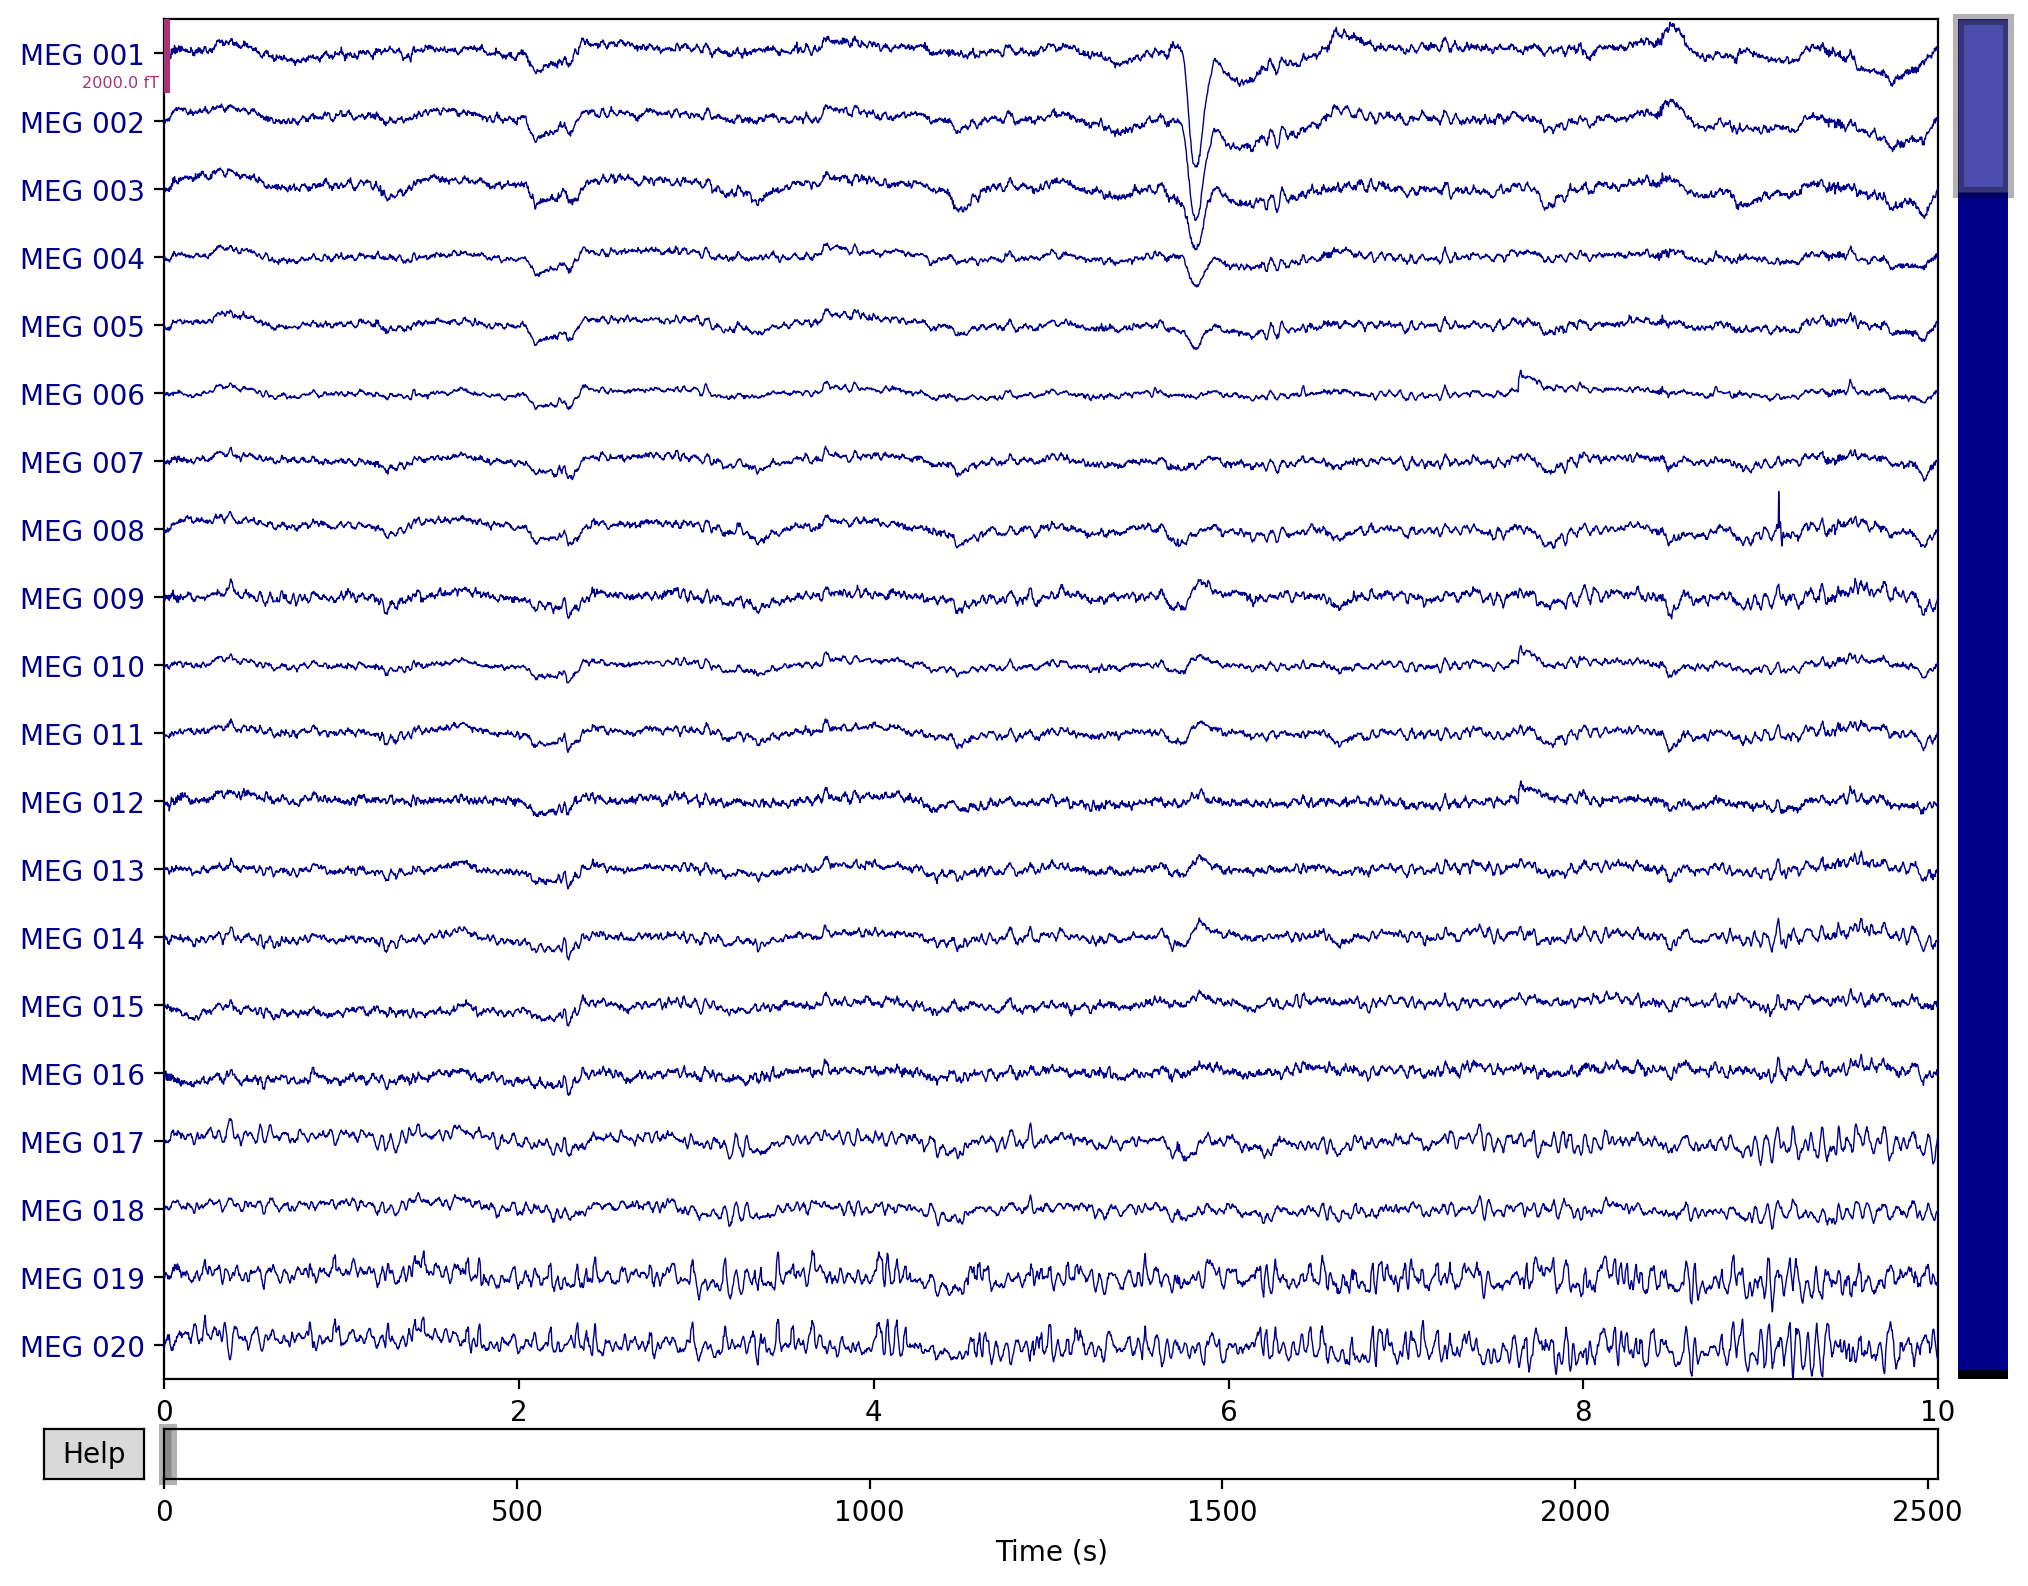

Channels marked as bad: none


In [18]:
# Step 1: Open the cnt file form of EEG data
# >> /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs
root_data_path = Path('/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG')
eeg_data_path = root_data_path / "LTTC_MEG_ALL_results"

# Wanted Subs = [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22]  # Sub021>> Maybe excluded
sub_idINT = 9


LTTCconFile = eeg_data_path / Path('de%.3d-1.con' %sub_idINT)  #'S001_Alice.cnt'  
'''
S001_Alice.cnt: 最外圈的（編號尾數7的）沒有很毛，所以不exclude
'''
LTTC_raw =  mne.io.read_raw_kit(LTTCconFile, stim = [195], preload=True)

#raw.load_data()
#raw.plot()
print(LTTC_raw.info)
print(LTTC_raw.info["ch_names"])


n_LTTC_raw = LTTC_raw.copy()

n_LTTC_raw.load_data().pick_types(meg=True, stim=True).filter(0.1, 200, phase='zero-double').resample(500)
print(n_LTTC_raw.info)
#print(events.shape)

n_LTTC_raw.plot()

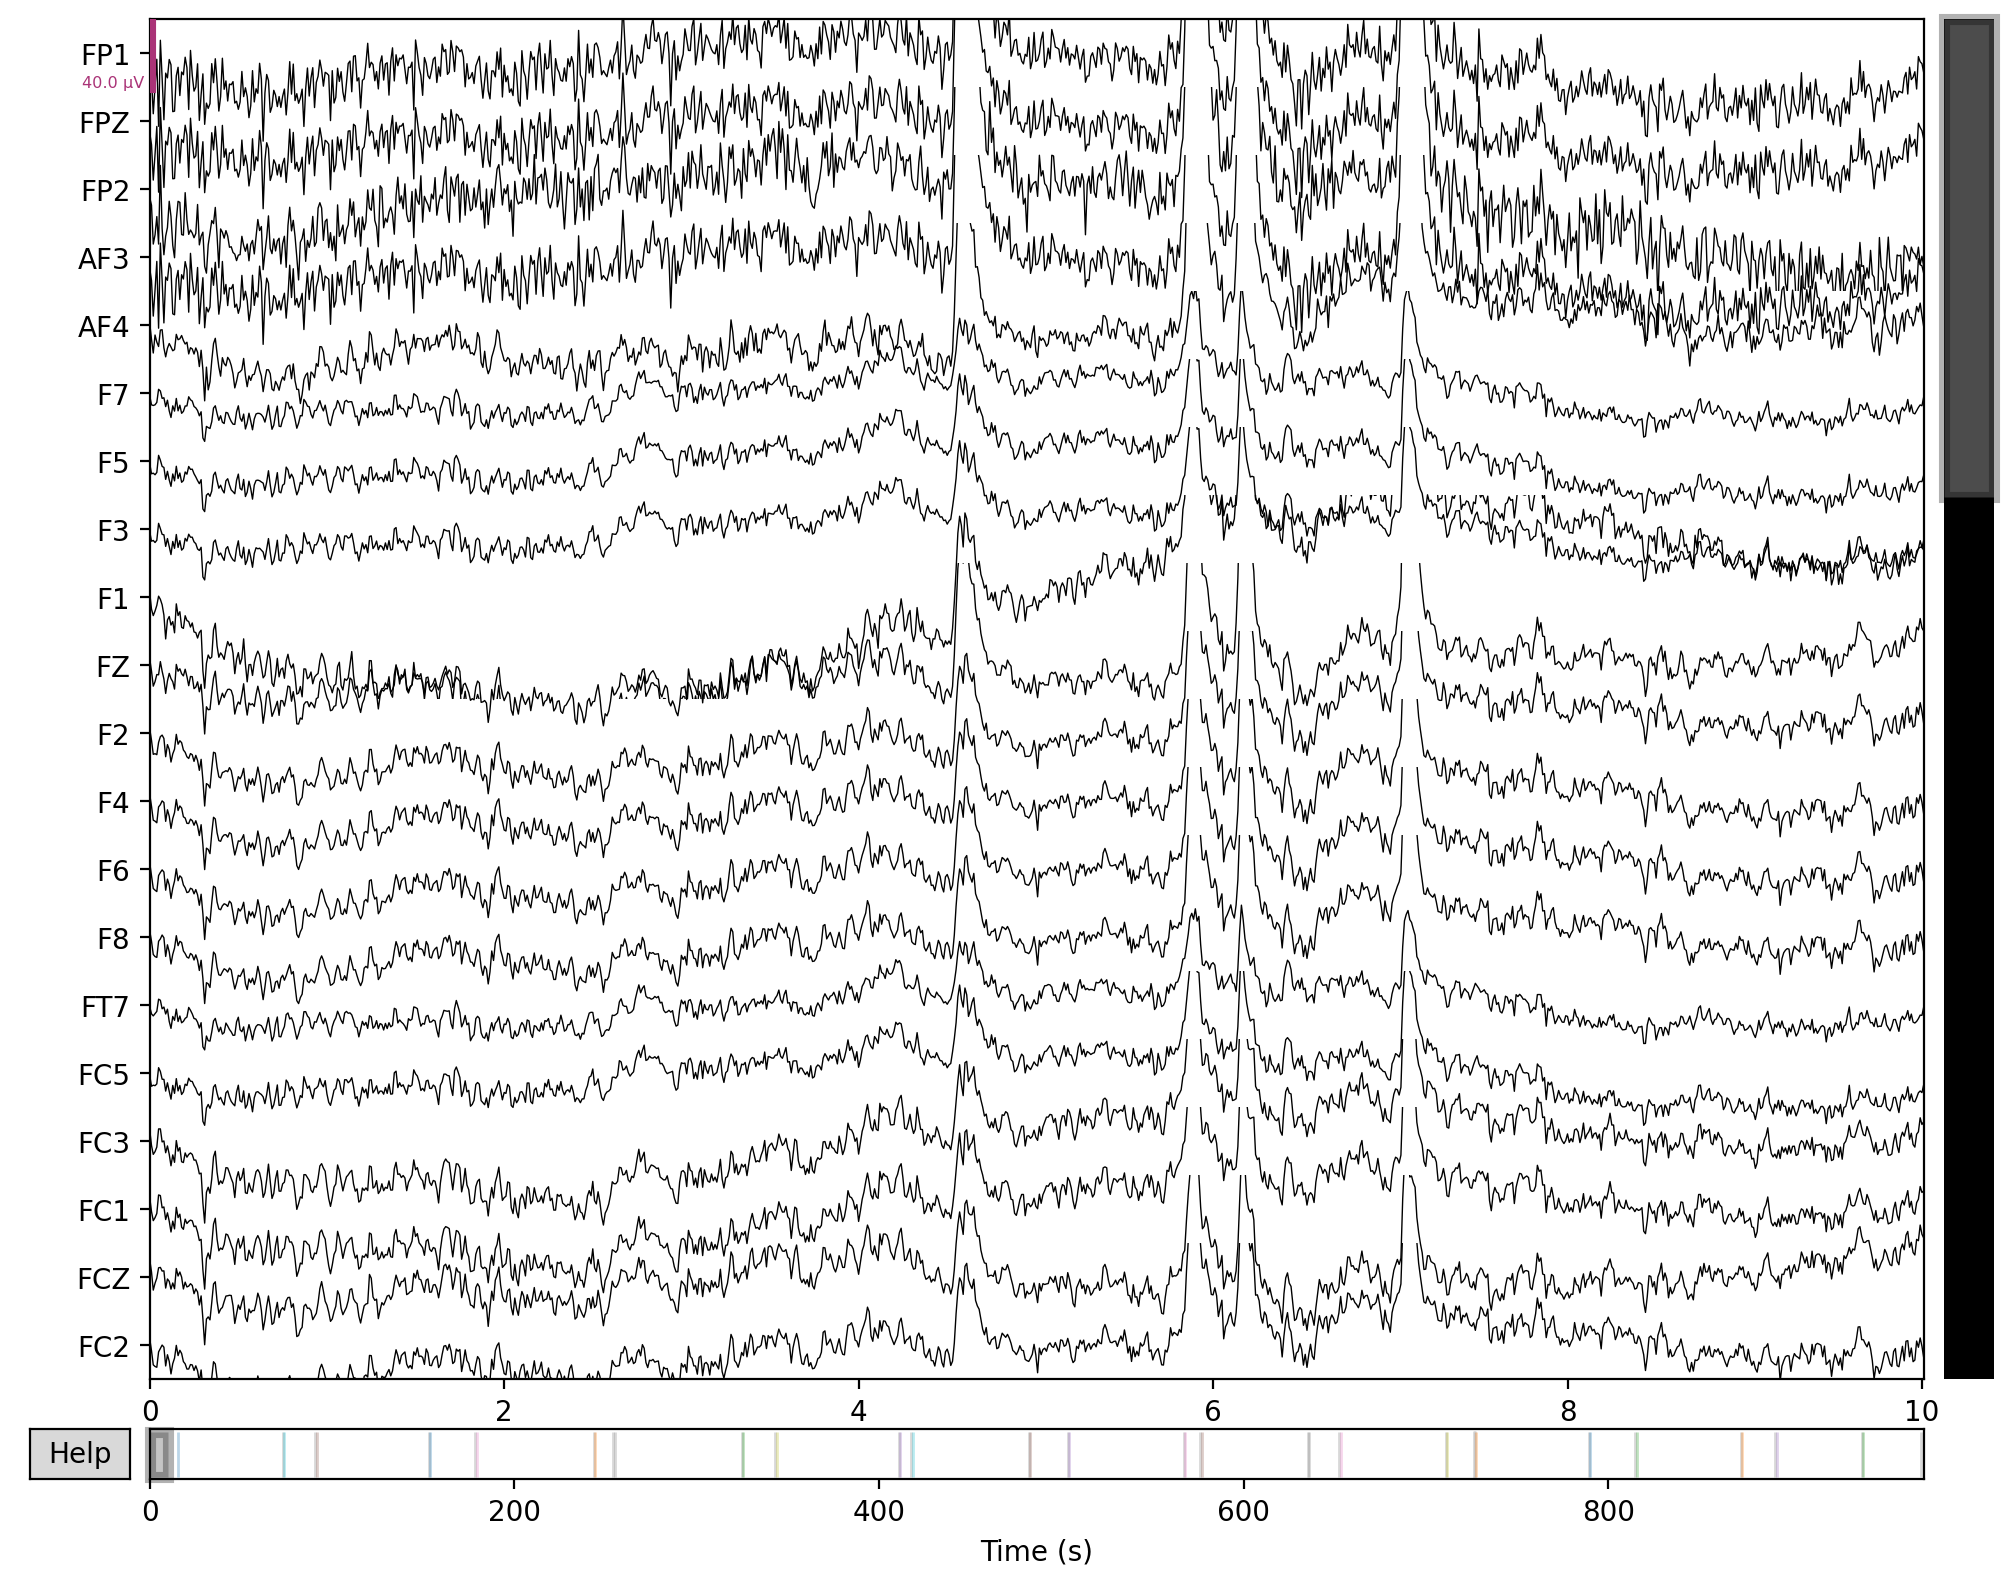

Channels marked as bad: none


In [5]:
n_raw.plot()

In [19]:
## WE NEED TO USE THE CUT FILE TO PERFORM ICA!!!

# ICA
ica_ = ICA(n_components = 15, random_state=97)
ica_.fit(n_LTTC_raw)

# plot ICA
#n_raw.plot_sensors(sphere = (0.0, 0.02, 0.0, 0.065))

# Exclude certain components
ica_.plot_sources(n_LTTC_raw)
ica_.plot_components(sphere = (0.0, 0.02, 0.0, 0.065))  # What is this sphere for??
#ica_.plot_overlay(n_raw, exclude=[0, 8])

Fitting ICA to data using 157 channels (please be patient, this may take a while)


/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


Selecting by number: 15 components
Fitting ICA took 77.9s.
Creating RawArray with float64 data, n_channels=15, n_times=1257500
    Range : 0 ... 1257499 =      0.000 ...  2514.998 secs
Ready.


/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/eelbrain/lib/python3.9/site-

[<MNEFigure size 1950x1463 with 15 Axes>]

In [20]:
for i in range(15):
    #ica_.plot_properties(n_raw, picks=[i])
    ica_.plot_overlay(n_LTTC_raw, exclude=[i])

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing o

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components


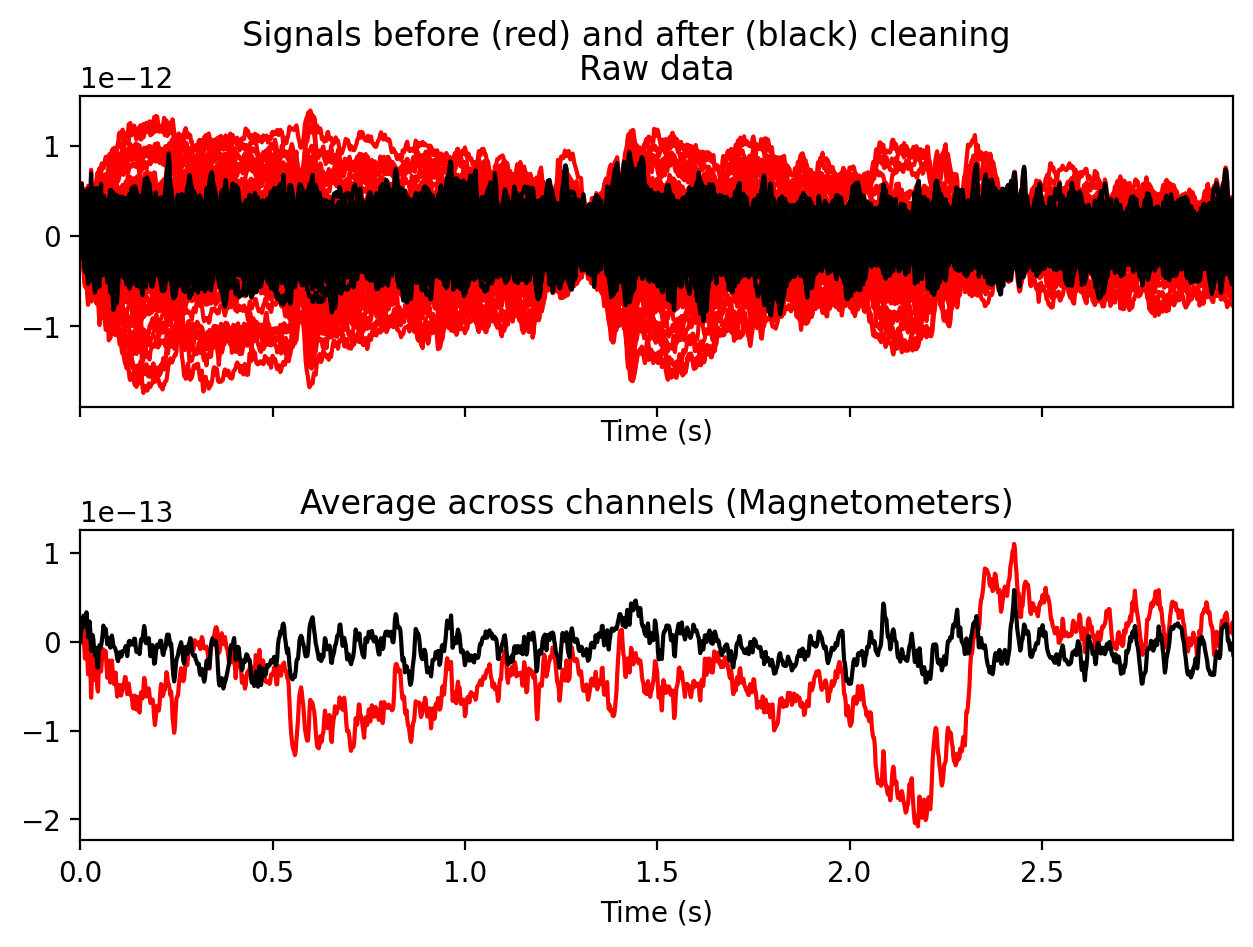

In [21]:
#c_all_tmpLIST = list(range(0, 15))
#print(c_all_tmpLIST)

ica_.plot_overlay(n_LTTC_raw, exclude=[0, 3])

#### Excluded components
1. Sub007: [0, 1, 3]
2. Sub009: [0, 3]

In [22]:
#### What the hack is this?????

# This is the properties of each component
#ica_.plot_properties(n_raw, picks=[0, 1, 2, 3, 4, 5, 6, 7, 8])

# apply the cleaned ICA to the data 
raw_ICAed = n_LTTC_raw.copy()
ica_.exclude = [0, 3]

ica_.plot_overlay(raw_ICAed, exclude=ica_.exclude)

ica_.apply(raw_ICAed)
#raw_ICAed.plot()

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 157 PCA components


<RawKIT | de009-1.con, 158 x 1257500 (2515.0 s), ~1.48 GB, data loaded>

In [23]:
ICAed_DIR = root_data_path / 'LTTC_ESLs_MEG_ICAed'
ICAed_DIR.mkdir(exist_ok=True)

In [24]:
# Save the ICAed data into fif file
#raw_ICAed.save(eeg_data_path/'Alice_ESL_ICAed_fif'/Path('_S%.3d_ICAed_raw.fif' %sub_idINT), overwrite=True)
raw_ICAed.save(ICAed_DIR / Path('deS%.3d_ICAed_raw.fif' %sub_idINT), overwrite=True)

Writing /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_ESLs_MEG_ICAed/deS009_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_ESLs_MEG_ICAed/deS009_ICAed_raw.fif
[done]


In [ ]:
# (Later) Combine two eeg data into one file (for S014/S018/S033/S037 only, for those have 2 or more files)
root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results')
eeg_data_path = root_data_path / "EEG_ESLs" / 'Alice_ESL_ICAed_fif'

eeg_data_1 = ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
eeg_data_1 = ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)

In [72]:
# After the ICAed file, the ESLs data needs to be cut in order to run the TRF productions
# Produce the cut_Q version of the EEG data

#root_data_path = Path('/Users/neuroling/Downloads/碩論data')
#eeg_data_path = root_data_path / "EEG_ESL"

root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results')
eeg_data_path = root_data_path / "EEG_ESLs" / 'Alice_ESL_ICAed_fif'

sub_idLIST = [path.name for path in eeg_data_path.iterdir() if re.match(r'_S\d\d\d', path.name)]  #n_v3
print(sub_idLIST)
print(sub_idLIST[0][0:4])  # >>S001

for sub_idSTR in sub_idLIST:
    subj_data_path = eeg_data_path / Path('%s' %sub_idSTR)

    ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
    events = mne.events_from_annotations(ICAed_raw)
    print(events)
    raw_sfreq = ICAed_raw.info['sfreq']
    print(raw_sfreq)
    print(type(raw_sfreq))

    events = mne.events_from_annotations(ICAed_raw)
    # covert the time points arrays into a list >> or is it better if we use it as the array??
    trigger_tPointsNDArray = events[0]  #.tolist()
    print(sub_idSTR, len(trigger_tPointsNDArray))
    
    if len(trigger_tPointsNDArray)==48:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::4]
        print(start_tNDarray)
        print(len(start_tNDarray))

        end_tNDarray = trigger_tPointsNDArray[1::4]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq))+0.5)
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
    
    if len(trigger_tPointsNDArray)==24:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::2]
        print(start_tNDarray)
        print(len(start_tNDarray))

        end_tNDarray = trigger_tPointsNDArray[1::2]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq))+0.5)
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
        
    if len(trigger_tPointsNDArray)==36:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::3]
        print(start_tNDarray)
        print(len(start_tNDarray))
        
        end_tNDarray = trigger_tPointsNDArray[1::3]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            # in here, we exclude the +0.5 at the end of the end points for the reason of 0.5 delay when the questions start trigger appear
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq)))
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
        
    else:
        pass
        #print(sub_idSTR, "is ERROR!")


['_S032_ICAed_raw.fif', '_S034_ICAed_raw.fif', '_S035_ICAed_raw.fif', '_S036_ICAed_raw.fif', '_S038_ICAed_raw.fif', '_S039_ICAed_raw.fif']
_S03
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S032_ICAed_raw.fif...
    Range : 0 ... 97291 =      0.000 ...   972.910 secs
Ready.
Reading 0 ... 97291  =      0.000 ...   972.910 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[ 1526,     0,     1],
       [ 7327,     0,    25],
       [ 7378,     0,     9],
       [ 9088,     0,    25],
       [ 9195,     0,     5],
       [15296,     0,    25],
       [15347,     0,    10],
       [17843,     0,    25],
       [17949,     0,     6],
       [24349,     0,    25],
       [24401,     0,    11],
       [25388,     0,    25],
       [25494,     0,     7],
       [32495,     0,    2

/var/folders/h7/sdf5cvgx3qzf5rh744693x0r0000gn/T/ipykernel_33733/3476202473.py:44: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  cut_eegs_all = mne.concatenate_raws(tmpLIST)


Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2__S032_ICAed_raw.fif
[done]
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S034_ICAed_raw.fif...
    Range : 0 ... 102179 =      0.000 ...  1021.790 secs
Ready.
Reading 0 ... 102179  =      0.000 ...  1021.790 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[  2198,      0,      1],
       [  7999,      0,     25],
       [  8050,      0,      9],
       [  9714,      0,     25],
       [  9819,      0,      5],
       [ 15920,      0,     25],
       [ 15971,      0,     10],
       [ 19967,      0,     25],
       [ 20073,      0,      6],
       [ 26474,      0,     25],
       [ 26525,      0,     11],
       [ 29354,      0,     25],
       [ 29461,      

/var/folders/h7/sdf5cvgx3qzf5rh744693x0r0000gn/T/ipykernel_33733/3476202473.py:44: RuntimeWarning: Omitted 2 annotation(s) that were outside data range.
  cut_eegs_all = mne.concatenate_raws(tmpLIST)


[done]
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S035_ICAed_raw.fif...
    Range : 0 ... 107855 =      0.000 ...  1078.550 secs
Ready.
Reading 0 ... 107855  =      0.000 ...  1078.550 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[  1851,      0,      1],
       [  7652,      0,     25],
       [  7703,      0,      9],
       [  9670,      0,     25],
       [ 10089,      0,      5],
       [ 16190,      0,     25],
       [ 16241,      0,     10],
       [ 20783,      0,     25],
       [ 20926,      0,      6],
       [ 27327,      0,     25],
       [ 27379,      0,     11],
       [ 28531,      0,     25],
       [ 28675,      0,      7],
       [ 35676,      0,     25],
       [ 35727,      0,     12],
       [ 36841,      0,     25],
       [ 36983,      0,

/var/folders/h7/sdf5cvgx3qzf5rh744693x0r0000gn/T/ipykernel_33733/3476202473.py:44: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  cut_eegs_all = mne.concatenate_raws(tmpLIST)


[done]
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S036_ICAed_raw.fif...
    Range : 0 ... 97923 =      0.000 ...   979.230 secs
Ready.
Reading 0 ... 97923  =      0.000 ...   979.230 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[ 3357,     0,     1],
       [ 9158,     0,    25],
       [ 9209,     0,     9],
       [11518,     0,    25],
       [11936,     0,     5],
       [18037,     0,    25],
       [18088,     0,    10],
       [21236,     0,    25],
       [21377,     0,     6],
       [27778,     0,    25],
       [27829,     0,    11],
       [30294,     0,    25],
       [30438,     0,     7],
       [37439,     0,    25],
       [37490,     0,    12],
       [38028,     0,    25],
       [38171,     0,     8],
       [44872,     0,    25],
       [44923

/var/folders/h7/sdf5cvgx3qzf5rh744693x0r0000gn/T/ipykernel_33733/3476202473.py:44: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  cut_eegs_all = mne.concatenate_raws(tmpLIST)


[done]
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S038_ICAed_raw.fif...
    Range : 0 ... 92759 =      0.000 ...   927.590 secs
Ready.
Reading 0 ... 92759  =      0.000 ...   927.590 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[ 2239,     0,     1],
       [ 8040,     0,    25],
       [ 8091,     0,     9],
       [ 9002,     0,    25],
       [ 9107,     0,     5],
       [15209,     0,    25],
       [15260,     0,    10],
       [16769,     0,    25],
       [16874,     0,     6],
       [23275,     0,    25],
       [23326,     0,    11],
       [24329,     0,    25],
       [24434,     0,     7],
       [31436,     0,    25],
       [31486,     0,    12],
       [32889,     0,    25],
       [32994,     0,     8],
       [39695,     0,    25],
       [39746

# ==============================================================
# Scripts below are the testing section(Don't use it for official preprocessing)

In [19]:
# (WORKED)Testing for seeing the 36 triggers

root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results')
eeg_data_path = root_data_path / "EEG_ESLs" / 'Alice_ESL_ICAed_fif'

sub_idLIST = [path.name for path in eeg_data_path.iterdir() if re.match(r'_S\d\d\d', path.name)]  #n_v3
print(sub_idLIST)
print(sub_idLIST[0][1:5])  # >>S001


for sub_idSTR in sub_idLIST:
    subj_data_path = eeg_data_path / Path('%s' %sub_idSTR)

    ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
    events = mne.events_from_annotations(ICAed_raw)
    print(events)
    raw_sfreq = ICAed_raw.info['sfreq']
    print(raw_sfreq)
    print(type(raw_sfreq))

    events = mne.events_from_annotations(ICAed_raw)
    # covert the time points arrays into a list >> or is it better if we use it as the array??
    trigger_tPointsNDArray = events[0]  #.tolist()
    print(sub_idSTR, len(trigger_tPointsNDArray))
    
    if len(trigger_tPointsNDArray)==36:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::3]
        print(start_tNDarray)
        print(len(start_tNDarray))
        
        end_tNDarray = trigger_tPointsNDArray[1::3]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            # in here, we exclude the +0.5 at the end of the end points for the reason of 0.5 delay when the questions start trigger appear
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq)))
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
        
    else:
        pass
        

['_S017_ICAed_raw.fif', '_S011_ICAed_raw.fif', '_S012_ICAed_raw.fif', '_S013_ICAed_raw.fif', '_S015_ICAed_raw.fif', '_S016_ICAed_raw.fif', '_S010_ICAed_raw.fif']
S017
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/_S017_ICAed_raw.fif...
    Range : 0 ... 91171 =      0.000 ...   911.710 secs
Ready.
Reading 0 ... 91171  =      0.000 ...   911.710 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '7', '8', '9', '99']
(array([[ 2150,     0,     1],
       [ 8001,     0,     9],
       [ 9169,     0,    25],
       [ 9275,     0,     5],
       [15426,     0,    10],
       [16663,     0,    25],
       [16768,     0,     6],
       [23219,     0,    11],
       [24156,     0,    25],
       [24262,     0,     7],
       [31313,     0,    12],
       [32327,     0,    25],
       [32433,     0,     8],
   

_S012_ICAed_raw.fif 36
[[  4388      0      1]
 [ 14839      0      5]
 [ 25673      0      6]
 [ 33361      0      7]
 [ 41504      0      8]
 [ 49014      0     18]
 [ 60419      0     22]
 [ 69588      0     23]
 [ 77224      0     24]
 [ 84207      0      2]
 [ 95117      0      3]
 [105799      0      4]]
12
[[ 10239      0      9]
 [ 20990      0     10]
 [ 32124      0     11]
 [ 40413      0     12]
 [ 48255      0     13]
 [ 55466      0     14]
 [ 66770      0     15]
 [ 75439      0     16]
 [ 83075      0     17]
 [ 90458      0     19]
 [100868      0     20]
 [110551      0     21]]
12
43.88 102.39
148.39 209.9
256.73 321.24
333.61 404.13
415.04 482.55
490.14 554.66
604.19 667.7
695.88 754.39
772.24 830.75
842.07 904.58
951.17 1008.68
1057.99 1105.51
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2__S012_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/A

_S016_ICAed_raw.fif 36
[[ 1618     0     1]
 [11119     0     5]
 [20185     0     6]
 [29369     0     7]
 [37977     0     8]
 [45872     0    18]
 [55512     0    22]
 [62767     0    23]
 [71225     0    24]
 [78330     0     2]
 [87804     0     3]
 [98675     0     4]]
12
[[  7469      0      9]
 [ 17270      0     10]
 [ 26636      0     11]
 [ 36420      0     12]
 [ 44728      0     13]
 [ 52323      0     14]
 [ 61863      0     15]
 [ 68618      0     16]
 [ 77076      0     17]
 [ 84582      0     19]
 [ 93555      0     20]
 [103426      0     21]]
12
16.18 74.69
111.19 172.7
201.85 266.36
293.69 364.2
379.77 447.28
458.72 523.23
555.12 618.63
627.67 686.18
712.25 770.76
783.3 845.82
878.04 935.55
986.75 1034.26
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2__S016_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2__S016_ICAed_raw.f

# ==============================================================
# Below is the TRF production section

In [ ]:
def raw2NDvar(raw, time):
  montage_x = eelbrain.load.fiff.sensor_dim(raw.info)
  temp_data = raw.get_data().T *1e+6
  eegNDVar = eelbrain.NDVar(temp_data, (time, montage_x), name='EEG', info={'unit': 'µV'})
  return eegNDVar

In [45]:
# Same scripts for I to conduct on iMac
# To check the data existence
root_data_path = Path('/Users/neuroling/Downloads/碩論data')
#eeg_data_path = root_data_path / "EEG_ESL"

sub_idLIST = [path.name for path in root_data_path.iterdir() if re.match(r'n_S\d*', path.name)]
print(sub_idLIST)

for sub_idSTR in sub_idLIST:
    subj_data_path = root_data_path / Path('%s' %sub_idSTR)

    ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
    
    events = mne.events_from_annotations(ICAed_raw)
    #raw_sfreq = ICAed_raw.info['sfreq']
    print(ICAed_raw.info)
    print(events)

['n_S003_ICAed_raw.fif', 'n_S007_ICAed_raw.fif', 'n_S004_ICAed_raw.fif', 'n_S008_ICAed_raw.fif', 'n_S005_ICAed_raw.fif', 'n_S001_ICAed_raw.fif', 'n_S006_ICAed_raw.fif', 'n_S002_ICAed_raw.fif']
Opening raw data file /Users/neuroling/Downloads/碩論data/n_S003_ICAed_raw.fif...
    Range : 35346 ... 765698 =     35.346 ...   765.698 secs
Ready.
Reading 0 ... 730352  =      0.000 ...   730.352 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', '99']
<Info | 12 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 57 EEG
 custom_ref_applied: True
 dig: 60 items (3 Cardinal, 57 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 200.0 Hz
 meas_date: 2022-10-04 07:06:47 UTC
 meas_id: 4 items (dict)
 nchan: 57
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 2 items (dict)
>
(array([[ 35446,      0,      1],
       [ 93457,      0,     13],
       [ 93558,      0,      5],
       [154570,  

    Range : 17804 ... 748157 =     17.804 ...   748.157 secs
Ready.
Reading 0 ... 730353  =      0.000 ...   730.353 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', '99']
<Info | 12 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 57 EEG
 custom_ref_applied: True
 dig: 60 items (3 Cardinal, 57 EEG)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 200.0 Hz
 meas_date: 2022-09-04 07:11:01 UTC
 meas_id: 4 items (dict)
 nchan: 57
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 2 items (dict)
>
(array([[ 17904,      0,      1],
       [ 75915,      0,     13],
       [ 76016,      0,      5],
       [137028,      0,     13],
       [137129,      0,      6],
       [201141,      0,     13],
       [201242,      0,      7],
       [271253,      0,     13],
       [271354,      0,      8],
       [338366,      0,     13],
       [338467,      0,      9],
       [402479,      0,   

In [7]:
# Testing on every confirmed ICA components
sub_idINT_LIST = ["001", "002", "003", "004-2", "005"]
ICA_cLIST = [[0,5], [0, 1, 2, 4], [0, 8, 14], [3, 4, 5, 6, 7], [0, 8]]

for sub_idINT in sub_idINT_LIST:
    sub_idSTR = "S%.3d" 
    print(sub_idINT)
    print(type(sub_idINT))
    index = sub_idINT_LIST.index(sub_idINT)
    print(index)
    print(ICA_cLIST[index])
"""
for c in ICA_cLIST:
    #print(c)
    print(type(c))
    
    print(ICA_cLIST.index())
    """

1
<class 'str'>
0
[0, 5]
2
<class 'str'>
1
[0, 1, 2, 4]
3
<class 'str'>
2
[0, 8, 14]
4-2
<class 'str'>
3
[3, 4, 5, 6, 7]
5
<class 'str'>
4
[0, 8]


'\nfor c in ICA_cLIST:\n    #print(c)\n    print(type(c))\n    \n    print(ICA_cLIST.index())\n    '

In [20]:
# The full process of ICA with downsample 
root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic')
eeg_data_path = root_data_path / "Experiments_Results/EEG"

sub_idSTR_LIST = ["001", "002", "003", "004-2", "005"]
#sub_idSTR_LIST = ["006_Alice_S002_2nd", "007_Alice_S001_2nd", "008_Alice"]
ICA_cLIST = [[0,5], [0, 1, 2, 4], [0, 8, 14], [3, 4, 5, 6, 7], [0, 8]]  # S001-005
#ICA_cLIST = [[0,2], [0,2], [0,1]]

for sub_idINT in sub_idSTR_LIST:
    #sub_idINT = 5

    cntFile = eeg_data_path / Path('S%s_Alice.cnt' %sub_idINT)  #'S001_Alice.cnt'  

    raw = mne.io.read_raw_cnt(cntFile)
    raw.load_data()
    # filter and exclude certain channels
    n_raw = raw.copy()
    n_raw.resample(sfreq=100)
    #n_raw.filter(0, 30, phase= 'zero-double')  # 再加0.1~30** / 1~30(訊號被扭曲的機率會更大) ，再重跑ICA
    n_raw.set_eeg_reference(['M1', 'M2'])
    n_raw.pick_types(eeg=True, stim=False, exclude=['M1', 'M2', 'O1', 'OZ', 'O2', 'CB1', 'CB2', 'HEOG', 'VEOG'])
                                                     # 'VEO', 'HEO', 'Audio' >> new layouts  #'HEOG', 'VEOG'
    
    # set montage????? yes!!!
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
    n_raw.set_montage(ten_twenty_montage, match_case=False)

    # ICA
    ica_ = ICA(n_components=15, random_state=97)
    ica_.fit(n_raw)
    
    c_index = sub_idSTR_LIST.index(sub_idINT)
    # apply the cleaned ICA to the data 
    ica_.exclude = ICA_cLIST[c_index]

    raw_ICAed = n_raw.copy()
    ica_.apply(raw_ICAed)
    #raw_ICAed.plot()

    # Save the ICAed data into fif file
    raw_ICAed.save(eeg_data_path/Path('S%s_sfreq-100-no-filter_ICAed_raw.fif' %sub_idINT), overwrite=True)

Reading 0 ... 824239  =      0.000 ...   824.239 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Fitting ICA to data using 57 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:30: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_raw)


Selecting by number: 15 components
Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 57 PCA components
Overwriting existing file.
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S001_sfreq-100-no-filter_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S001_sfreq-100-no-filter_ICAed_raw.fif
[done]
Reading 0 ... 816239  =      0.000 ...   816.239 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Fitting ICA to data using 57 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:30: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_raw)


Selecting by number: 15 components
Fitting ICA took 2.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 4 ICA components
    Projecting back using 57 PCA components
Overwriting existing file.
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S002_sfreq-100-no-filter_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S002_sfreq-100-no-filter_ICAed_raw.fif
[done]
Reading 0 ... 966479  =      0.000 ...   966.479 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Fitting ICA to data using 57 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:30: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_raw)


Selecting by number: 15 components
Fitting ICA took 2.0s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 3 ICA components
    Projecting back using 57 PCA components
Overwriting existing file.
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S003_sfreq-100-no-filter_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S003_sfreq-100-no-filter_ICAed_raw.fif
[done]
Reading 0 ... 808679  =      0.000 ...   808.679 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Fitting ICA to data using 57 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:30: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_raw)


Selecting by number: 15 components
Fitting ICA took 20.3s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 5 ICA components
    Projecting back using 57 PCA components
Overwriting existing file.
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S004-2_sfreq-100-no-filter_ICAed_raw.fif


/Applications/anaconda3/envs/mne/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S004-2_sfreq-100-no-filter_ICAed_raw.fif
[done]
Reading 0 ... 829759  =      0.000 ...   829.759 secs...


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:14: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(cntFile)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Fitting ICA to data using 57 channels (please be patient, this may take a while)


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_89356/1642499229.py:30: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica_.fit(n_raw)


Selecting by number: 15 components
Fitting ICA took 1.7s.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 2 ICA components
    Projecting back using 57 PCA components
Overwriting existing file.
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S005_sfreq-100-no-filter_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S005_sfreq-100-no-filter_ICAed_raw.fif
[done]


In [3]:
# Produce the cut_Q version of the EEG data

#root_data_path = Path('/Users/neuroling/Downloads/碩論data')
#eeg_data_path = root_data_path / "EEG_ESL"

root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results')
eeg_data_path = root_data_path / "EEG_ESLs" / 'Alice_ESL_ICAed_fif'

sub_idLIST = [path.name for path in eeg_data_path.iterdir() if re.match(r'S\d\d\d', path.name)]  #n_v3
print(sub_idLIST)
print(sub_idLIST[0][0:4])  # >>S001

for sub_idSTR in sub_idLIST:
    subj_data_path = eeg_data_path / Path('%s' %sub_idSTR)

    ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
    events = mne.events_from_annotations(ICAed_raw)
    print(events)
    raw_sfreq = ICAed_raw.info['sfreq']
    print(raw_sfreq)
    print(type(raw_sfreq))

    events = mne.events_from_annotations(ICAed_raw)
    # covert the time points arrays into a list >> or is it better if we use it as the array??
    trigger_tPointsNDArray = events[0]  #.tolist()
    print(sub_idSTR, len(trigger_tPointsNDArray))
    
    if len(trigger_tPointsNDArray)==48:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::4]
        print(start_tNDarray)
        print(len(start_tNDarray))

        end_tNDarray = trigger_tPointsNDArray[1::4]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq))+0.5)
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
    
    if len(trigger_tPointsNDArray)==24:
        # Save the start % end timepoints into ndarray respectively.  
        start_tNDarray = trigger_tPointsNDArray[::2]
        print(start_tNDarray)
        print(len(start_tNDarray))

        end_tNDarray = trigger_tPointsNDArray[1::2]
        print(end_tNDarray)
        print(len(end_tNDarray))
        
        tmpLIST = []
        for points in range(12):
            print(start_tNDarray[points][0]/int(raw_sfreq), end_tNDarray[points][0]/int(raw_sfreq))
            cut_eeg = ICAed_raw.copy().crop((start_tNDarray[points][0]/int(raw_sfreq))-0.2, (end_tNDarray[points][0]/int(raw_sfreq))+0.5)
            tmpLIST.append(cut_eeg)
        cut_eegs_all = mne.concatenate_raws(tmpLIST)
        cut_eegs_all.save(eeg_data_path/Path('n_2_%s' %sub_idSTR), overwrite=True)
    else:
        pass
        #print(sub_idSTR, "is ERROR!")


['S001_ICAed_raw.fif', 'S002_ICAed_raw.fif', 'S003_ICAed_raw.fif', 'S004_ICAed_raw.fif', 'S005_ICAed_raw.fif', 'S006_ICAed_raw.fif', 'S007_ICAed_raw.fif', 'S008_ICAed_raw.fif']
S001
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/S001_ICAed_raw.fif...
    Range : 0 ... 824239 =      0.000 ...   824.239 secs
Ready.
Reading 0 ... 824239  =      0.000 ...   824.239 secs...
Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', '99']
(array([[ 17904,      0,      1],
       [ 75915,      0,     13],
       [ 81199,      0,      5],
       [142211,      0,     13],
       [147475,      0,      6],
       [211487,      0,     13],
       [217021,      0,      7],
       [287032,      0,     13],
       [292539,      0,      8],
       [359551,      0,     13],
       [365067,      0,      9],
       [429079,      0,     13],
       [434585,      0,     10],
       [497597,     

S004_ICAed_raw.fif 24
[[  7879      0      1]
 [ 70920      0      5]
 [136962      0      6]
 [206004      0      7]
 [281046      0      8]
 [356075      0      9]
 [425600      0     10]
 [494104      0     11]
 [557609      0     12]
 [621127      0      2]
 [688621      0      3]
 [751101      0      4]]
12
[[ 65890      0     13]
 [131932      0     13]
 [200974      0     13]
 [276017      0     13]
 [348059      0     13]
 [420087      0     13]
 [488611      0     13]
 [552115      0     13]
 [615621      0     13]
 [683138      0     13]
 [745633      0     13]
 [798112      0     13]]
12
7.879 65.89
70.92 131.932
136.962 200.974
206.004 276.017
281.046 348.059
356.075 420.087
425.6 488.611
494.104 552.115
557.609 615.621
621.127 683.138
688.621 745.633
751.101 798.112
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2_S004_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Resu

S007_ICAed_raw.fif 48
[[ 26289      0      1]
 [102954      0      5]
 [178931      0      6]
 [259980      0      7]
 [339669      0      8]
 [423993      0     19]
 [504082      0     22]
 [574824      0     23]
 [643401      0     24]
 [727323      0      2]
 [803151      0      3]
 [881927      0      4]]
12
[[ 84300      0     25]
 [163965      0     25]
 [242943      0     25]
 [329992      0     25]
 [406680      0     25]
 [488004      0     25]
 [567094      0     25]
 [632835      0     25]
 [701413      0     25]
 [789334      0     25]
 [860162      0     25]
 [928938      0     25]]
12
26.289 84.3
102.954 163.965
178.931 242.943
259.98 329.992
339.669 406.68
423.993 488.004
504.082 567.094
574.824 632.835
643.401 701.413
727.323 789.334
803.151 860.162
881.927 928.938
Writing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_2_S007_ICAed_raw.fif
Closing /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Re

In [75]:
# TESTING script, which was paste on the TRF.py file later on
# produce the NDVar from the cut EEG data
root_data_path = Path('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results')
eeg_data_path = root_data_path / "EEG_ESLs" / 'Alice_ESL_ICAed_fif'

sub_idLIST = [path.name for path in eeg_data_path.iterdir() if re.match(r'n_v4S\d*', path.name)]  #n_v3
print(sub_idLIST)
idLIST = [str(i) for i in range(1, 13)]
print(idLIST)

stim_len = 73665

for sub_idSTR in sub_idLIST[:2]:
    subj_data_path = eeg_data_path / Path('%s' %sub_idSTR)
    
    ICAed_raw = mne.io.read_raw_fif(subj_data_path, preload=True)
    eeg_ = ICAed_raw.resample(sfreq=100).get_data()   # eeg_shape = (57, 737554) # already channels by times  
    #print(ICAed_raw.info)
    #print(len(ICAed_raw))
    
    if eeg_.shape[1] > stim_len:
        eeg_ = eeg_[:, :stim_len]
    
    # produce the time for NDVar production
    tstep = 1. / ICAed_raw.info['sfreq']
    n_times = eeg_.shape[1] #audio.shape[0]
    time = eelbrain.UTS(0, tstep, n_times)
    
    print(time)

    # NDVar production
    montage_x = eelbrain.load.fiff.sensor_dim(ICAed_raw.info)
    temp_data = eeg_.T *1e+6
    eegNDVar = eelbrain.NDVar(temp_data, (time, montage_x), name='EEG', info={'unit': 'µV'})
    print(eegNDVar)



['n_v4S001_ICAed_raw.fif', 'n_v4S002_ICAed_raw.fif', 'n_v4S003_ICAed_raw.fif', 'n_v4S004_ICAed_raw.fif', 'n_v4S005_ICAed_raw.fif', 'n_v4S006_ICAed_raw.fif', 'n_v4S007_ICAed_raw.fif', 'n_v4S008_ICAed_raw.fif']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
Opening raw data file /Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG_ESLs/Alice_ESL_ICAed_fif/n_v4S001_ICAed_raw.fif...
    Range : 17704 ... 755257 =     17.704 ...   755.257 secs
Ready.
Reading 0 ... 737553  =      0.000 ...   737.553 secs...


AttributeError: 'numpy.ndarray' object has no attribute 'np'

# ==============================================================
# Below is the Old scripts to look at trigger points and other things

In [27]:
# Load in the csv file of word onset
#csv_data_path = "/Users/neuroling/Downloads/New_thesis/Ding-Thesis_ExpMaterials/"
csv_data_path = "/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Alice(EEG dataset_mat_and stimuli)/"
with open(csv_data_path + "AliceChapterOne-EEG.csv", "r", encoding="UTF-8") as f:
    fileLIST = f.read().split("\n")
    # the average of every word length is 0.2812(s) , approximately 300 ms
    
    word_onset_tapeLIST = []
    word_onset_allLIST = []
    tape_num_allLIST = []
    word_allLIST = []
    
    #exculde the header
    fileLIST.pop(0)
    print(len(fileLIST))
    
    
    for i in range(12):
        #print(i+1)
        word_onset_tapeLIST = []
        for row in fileLIST:    
            row = row.split(",")
            #print(row)
            #print(type(row))
            
            # some factors that are needed
            wordSTR = row[0]
            tape_numINT = int(row[1])
            word_onsetFLOAT = float(row[2])
            word_seqINT = int(row[10])
            sentence_seqINT = int(row[11])
            
            #print(sentence_seqINT)
            #print(type(sentence_seqINT))
            
            if tape_numINT == i+1:
                #print(wordSTR)
                
                word_onset_tapeLIST.append(word_onsetFLOAT)
            else:
                pass
        #pprint(word_onset_tapeLIST)
        print(len(word_onset_tapeLIST))
        word_onset_allLIST.append(word_onset_tapeLIST)
    #print(word_onset_allLIST)
    print(len(word_onset_allLIST))
    #for t in range(12):
        #print(len(word_onset_allLIST[t]))


2129
174
177
184
214
193
197
178
175
156
187
157
137
12


In [29]:
def correct_time(Start_timeFLOAT, End_timeFLOAT, stim_onsetFLOAT):
    '''
    to calculate the actual epoch start & end timepoints >>> Still need more calculation(NOT YET)
    
    Start_timeFLOAT = The timepoint of the segmented data start
    End_timeFLOAT = The timepoint of the segmented data end
    stim_onsetFLOAT = Every word onset timepoints
    '''
    actual_timeFLOAT = stim_onsetFLOAT*(End_timeFLOAT-Start_timeFLOAT)+(Start_timeFLOAT)
    return actual_timeFLOAT

def tpoints2sec(timepointsINT, sampling_rateINT):
    '''
    turn the timepoints to time (second, s) by divided by the sampling rate 
    >> mne.events_from_annotations(raw) >> event array[0]
    '''
    time_secFLOAT = timepointsINT/sampling_rateINT
    
    return time_secFLOAT
    

In [30]:
# Testing the tpoints2sec function

events = mne.events_from_annotations(raw_ICAed)
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
#print(start_tNDarray)
#print(type(start_tNDarray))

end_tNDarray = trigger_tPointsNDArray[1::4]
#print(end_tNDarray)
#print(type(end_tNDarray))
#print(len(end_tNDarray))


for k in range(12):
    start_tFLOAT = tpoints2sec(start_tNDarray[k][0], 250)
    end_tFLOAT = tpoints2sec(end_tNDarray[k][0], 250)
    print(start_tFLOAT)
    print(end_tFLOAT)


Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9', '99']
10.82
68.832
143.532
207.544
288.544
355.556
430.568
493.576
562.54
620.552
693.512
750.524


IndexError: index 6 is out of bounds for axis 0 with size 6

In [10]:
trigger_tPointsNDArray, event_idDICT = mne.events_from_annotations(raw_ICAed.copy())
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
#trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
print("Old start t points:",start_tNDarray)
#print(type(start_tNDarray))

end_tNDarray = trigger_tPointsNDArray[1::4]
print("Old end t points:",end_tNDarray)
#print(type(end_tNDarray))
print(len(end_tNDarray))


"""

### CONTINUE LATER ###
epoch_allLIST = []

# calculate the actual word onset by applying the min max scaling formula
for i in range(2):
    print(word_onset_allLIST[i])
    
    #start_tINT = start_tNDarray[i][0]
    #end_tINT = end_tNDarray[i][0]
    
    epoch_tapeLIST = []
    for onset_t in word_onset_allLIST[i]:
        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
        
        epoch_onset = correct_time(start_tFLOAT, end_tFLOAT, onset_t)  #/1000
        #print(epoch_onset)        
        epoch_tapeLIST.append(epoch_onset)
    print(len(word_onset_allLIST[i]))
    #print(epoch_tapeLIST)
    print(len(epoch_tapeLIST))
    
    epoch_allLIST.append(epoch_tapeLIST)
print(epoch_allLIST)
print(len(epoch_allLIST))
"""

Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9', '99']
Old start t points: [[  6572      0      1]
 [ 25738      0      5]
 [ 44733      0      6]
 [ 64995      0      7]
 [ 84917      0      8]
 [105998      0     19]
 [126020      0     22]
 [143706      0     23]
 [160850      0     24]
 [181831      0      2]
 [200788      0      3]
 [220482      0      4]]
Old end t points: [[ 21075      0     25]
 [ 40991      0     25]
 [ 60736      0     25]
 [ 82498      0     25]
 [101670      0     25]
 [122001      0     25]
 [141774      0     25]
 [158209      0     25]
 [175353      0     25]
 [197334      0     25]
 [215040      0     25]
 [232234      0     25]]
12


'\n\n### CONTINUE LATER ###\nepoch_allLIST = []\n\n# calculate the actual word onset by applying the min max scaling formula\nfor i in range(2):\n    print(word_onset_allLIST[i])\n    \n    #start_tINT = start_tNDarray[i][0]\n    #end_tINT = end_tNDarray[i][0]\n    \n    epoch_tapeLIST = []\n    for onset_t in word_onset_allLIST[i]:\n        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)\n        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)\n        \n        epoch_onset = correct_time(start_tFLOAT, end_tFLOAT, onset_t)  #/1000\n        #print(epoch_onset)        \n        epoch_tapeLIST.append(epoch_onset)\n    print(len(word_onset_allLIST[i]))\n    #print(epoch_tapeLIST)\n    print(len(epoch_tapeLIST))\n    \n    epoch_allLIST.append(epoch_tapeLIST)\nprint(epoch_allLIST)\nprint(len(epoch_allLIST))\n'

In [11]:
# Creating epochs (cutting into epochs so to speak)

epoch_allLIST = []

# To calculate the actual time for every word_onset, and save it down as a bug LIST
for i in range(12):
    #start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
    #end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
    #print(start_tFLOAT)
    #print(end_tFLOAT)        
    epoch_tapeLIST = []
    
    for onset_tFLOAT in word_onset_allLIST[i]:
        #print(type(onset_tFLOAT))
        
        start_tFLOAT = tpoints2sec(start_tNDarray[i][0], 250)
        end_tFLOAT = tpoints2sec(end_tNDarray[i][0], 250)
        
        epoch_onsetFLOAT = start_tFLOAT + onset_tFLOAT  #/1000
        #print(epoch_onsetFLOAT)
        
        epoch_tapeLIST.append(epoch_onsetFLOAT)

    #print(epoch_tapeLIST)
    #print(len(epoch_tapeLIST))
    
    epoch_allLIST.append(epoch_tapeLIST)
    
#print(epoch_allLIST)
#print(len(epoch_allLIST))


In [ ]:
def newTag4word_onsetARRAY(epoch_allLIST, sampling_rate)   #, loop_counts):  #, epoch_onsetFLOAT
    '''
    Turn the word onset time into a ndarray for further epoch dissection
    
    epoch_onsetFLOAT = Coverted word onset time based on the individual's raw data (in seconds)
    sampling_rate = The sampling rate of the current data
    #loop_counts = How many times do you want to repeat the procedure = the length of the epoch_allLIST
    '''
    #loop_counts = len
    
    for i in range(len(epoch_allLIST)):
    

In [151]:
def correct_time(Start_timeFLOAT, End_timeFLOAT, stim_onsetFLOAT):
    '''
    to calculate the actual epoch start & end timepoints >>> Still need more calculation(NOT YET)
    
    Start_timeFLOAT = The timepoint of the segmented data start
    End_timeFLOAT = The timepoint of the segmented data end
    stim_onsetFLOAT = Every word onset timepoints
    '''
    actual_timeFLOAT = stim_onsetFLOAT*(End_timeFLOAT-Start_timeFLOAT)+(Start_timeFLOAT)
    return actual_timeFLOAT

# (NOT YET)calculate a more precise datapoint for future epoch calculation
import math  # for 無條件進位

for i in range(12):
    min
    for onset_tFLOAT in word_onset_allLIST[i]:
        
        tmp_timeFLOAT = (word_onsetFLOAT-word_onset_minFLOAT)/(word_onset_maxFLOAT-word_onset_minFLOAT)
    actual_timeINT = math.ceil(tmp_timeFLOAT*trigger_dINT)

"""
for i in range(12):
    tape_tagINT = 26  # for the new event_idDICT's tag  i.e "tape1_word_onset":26 etc.
    for epoch_tFLOAT in epoch_allLIST[i]:
        epoch_tPointsINT = round((epoch_tFLOAT*250), 1)
        n_epoch_tPointsINT = math.ceil(epoch_tFLOAT*250)
        #print(epoch_tPointsINT)
        #print(n_epoch_tPointsINT)
        
        onset_tPointsLIST = [n_epoch_tPointsINT, 0, tape_tagINT]
        all_onset_tPointsLIST.append(onset_tPointsLIST)
all_onset_tPointsARRAY = np.array(all_onset_tPointsLIST)
"""

SyntaxError: expected ':' (2492082761.py, line 15)

In [12]:
# calculate the word onset datapoint
import math  # for 無條件進位

all_onset_tPointsLIST = []
for i in range(12):
    tape_tagINT = 26  # for the new event_idDICT's tag  i.e "tape1_word_onset":26 etc.
    for epoch_tFLOAT in epoch_allLIST[i]:
        epoch_tPointsINT = round((epoch_tFLOAT*250), 1)
        n_epoch_tPointsINT = math.ceil(epoch_tFLOAT*250)
        #print(epoch_tPointsINT)
        #print(n_epoch_tPointsINT)
        
        onset_tPointsLIST = [n_epoch_tPointsINT, 0, tape_tagINT]
        all_onset_tPointsLIST.append(onset_tPointsLIST)
all_onset_tPointsARRAY = np.array(all_onset_tPointsLIST)

print(all_onset_tPointsARRAY[:200])
#print(len(all_onset_tPointsARRAY))
print(all_onset_tPointsARRAY.shape)


[[ 6584     0    26]
 [ 6713     0    26]
 [ 6769     0    26]
 [ 6887     0    26]
 [ 6911     0    26]
 [ 6977     0    26]
 [ 7150     0    26]
 [ 7272     0    26]
 [ 7307     0    26]
 [ 7399     0    26]
 [ 7444     0    26]
 [ 7486     0    26]
 [ 7599     0    26]
 [ 7641     0    26]
 [ 7672     0    26]
 [ 7769     0    26]
 [ 7800     0    26]
 [ 7831     0    26]
 [ 7931     0    26]
 [ 8045     0    26]
 [ 8085     0    26]
 [ 8359     0    26]
 [ 8418     0    26]
 [ 8447     0    26]
 [ 8562     0    26]
 [ 8638     0    26]
 [ 8713     0    26]
 [ 8767     0    26]
 [ 8793     0    26]
 [ 8880     0    26]
 [ 8901     0    26]
 [ 9000     0    26]
 [ 9063     0    26]
 [ 9275     0    26]
 [ 9304     0    26]
 [ 9326     0    26]
 [ 9395     0    26]
 [ 9428     0    26]
 [ 9555     0    26]
 [ 9581     0    26]
 [ 9793     0    26]
 [ 9826     0    26]
 [10017     0    26]
 [10058     0    26]
 [10100     0    26]
 [10129     0    26]
 [10174     0    26]
 [10254     0

In [13]:
#event_idDICT = events[1]
pprint(event_idDICT)
# Copy the original event id, in case any irreversible changes happened
copied_event_idDICT = event_idDICT.copy()
#print(copied_event_idDICT)

# Set up the word onset tag's event_id DICT
"""
tape_word_onsetDICT = {'tape1_word_onset': 26,
                       'tape2_word_onset': 27,
                       'tape3_word_onset': 28,
                       'tape4_word_onset': 29,
                       'tape5_word_onset': 30,
                       'tape6_word_onset': 31,
                       'tape7_word_onset': 32,
                       'tape8_word_onset': 33,
                       'tape9_word_onset': 34,
                       'tape10_word_onset': 35,
                       'tape11_word_onset': 36,
                       'tape12_word_onset': 37}
                       """
tape_word_onsetDICT = {'tape_word_onset': 26}

# Combine the original event_idDICT with the word_onset tag DICT
copied_event_idDICT.update(tape_word_onsetDICT)
pprint(copied_event_idDICT)


{'1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '50': 9,
 '51': 10,
 '52': 11,
 '53': 12,
 '54': 13,
 '55': 14,
 '56': 15,
 '57': 16,
 '58': 17,
 '59': 18,
 '6': 19,
 '60': 20,
 '61': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 '99': 25}
{'1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '50': 9,
 '51': 10,
 '52': 11,
 '53': 12,
 '54': 13,
 '55': 14,
 '56': 15,
 '57': 16,
 '58': 17,
 '59': 18,
 '6': 19,
 '60': 20,
 '61': 21,
 '7': 22,
 '8': 23,
 '9': 24,
 '99': 25,
 'tape_word_onset': 26}


In [14]:
# Create the epochs based on the new event id
"""
tmin = -0.5                                         # pre stimulis interval (in seconds) #
tmax = 1.0                                          # post stimulus interval #

picks = mne.pick_types(raw_.info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_clean, new_events, event_id, tmin, tmax, proj = True,
                    picks = picks, baseline=baseline,
                    reject = reject_, preload = True)
"""

new_event_idDICT = tape_word_onsetDICT  #copied_event_idDICT
tmin = -0.1      # pre stimulis interval (in second) #
tmax = 0.5       # post stimulus interval (in second) # 

picks = mne.pick_types(raw_ICAed.copy().info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_ICAed.copy(), all_onset_tPointsARRAY, new_event_idDICT, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline,
                    reject=reject_, preload=True)   #reject = reject_ original
        

Not setting metadata
Not setting metadata
2129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 2129 events and 151 original time points ...
0 bad epochs dropped


In [17]:
# plotting the epochs based on each word onset in every tape
"""
# evoked based on each tape
for tapeINT in range(12):
    tape_evoked = epochs['tape%s_word_onset' %str(tapeINT+1)].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.5 )
    tape_evoked.plot_topo()
"""
# evoked of every word
tape_evoked = epochs['tape_word_onset'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.5)
tape_evoked.plot()
#tape_evoked.plot_topo()
#tape_evoked.plot_topomap()

    
    
"""
# Make a comparison
tmp = [std_evoked, devL_evoked, devS_evoked]
colors = 'red', 'blue', 'green'
#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))
mne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')
"""

Applying baseline correction (mode: mean)


"\n# Make a comparison\ntmp = [std_evoked, devL_evoked, devS_evoked]\ncolors = 'red', 'blue', 'green'\n#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))\nmne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')\n"

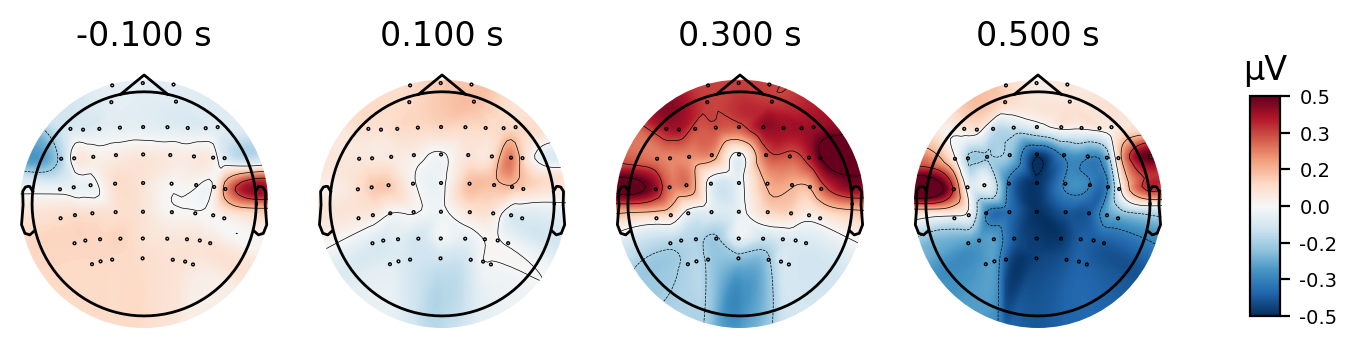

In [148]:
tape_evoked.plot_topomap()

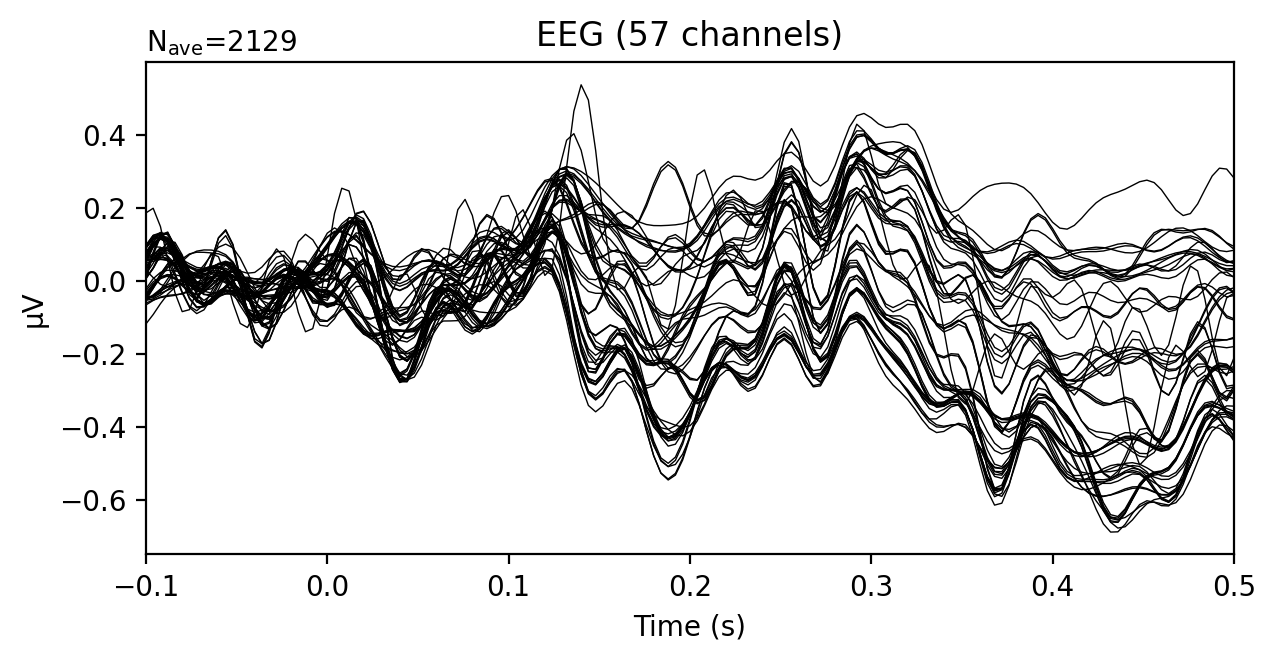

In [150]:
tape_evoked.plot()

## Below are the old codes

In [ ]:
# Use the event id >> should segment the data first??
event_id = {'1': 1, '10': 2, '11': 3, '12': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '99': 13}
#{'1': 1, '10': 2, '11': 3, '12': 4, '2': 5, '3': 6, '4': 7, '5': 8, '6': 9, '7': 10, '8': 11, '9': 12, '99': 13}
                                        # state which conditions match with which triggers #

# each epoch would be 300 ms long 
# >> start_timepoint = each onset, end_timepoint = onset + 0.3 
# need to recalibrate the starting time point in every part of 
tmin = -0.5                                         # pre stimulis interval (in seconds) #
tmax = 1.0                                          # post stimulus interval #

picks = mne.pick_types(raw_.info, eeg= True, stim = False)    # channels to use in epochs #
baseline = (-0.1, 0)      
reject_ = dict(eeg=100e-6) # eeg: V, meg: T                                                       # what to use as baseline comparison - here it's pre-stim interval #
epochs = mne.Epochs(raw_clean, new_events, event_id, tmin, tmax, proj = True,
                    picks = picks, baseline=baseline,
                    reject = reject_, preload = True)

In [ ]:
# see the average of the epochs, I think

std_evoked = epochs['Standard (yi3)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devL_evoked = epochs['Large deviant (yi1)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)
devS_evoked = epochs['Small deviant (yi2)'].average().apply_baseline((-0.1, 0)).pick_types(eeg= True, stim = False).crop(-0.1, 0.7)

print(std_evoked)
print(devL_evoked)
print(devS_evoked)

In [22]:
# OLD VERSION OF CUTTING THE FILES

# List out the triggers #the starting and ending time point for each tape #時間要除以1000=事件發生的時間點
events = mne.events_from_annotations(raw_ICAed)
#print(events)

# covert the time points arrays into a list >> or is it better if we use it as the array??
trigger_tPointsNDArray = events[0]  #.tolist()
#print(trigger_tPointsNDArray)  

"""
dict.keys()
dict.values()
dict.items()

triggerLIST = list(range(1,13))
#print(triggerLIST)

trigger_nameDICT = events[1]
triggerkey = trigger_nameDICT.keys()
trigger_nameDICT.keys()    # the actual number mark I made for trigger
print(trigger_nameDICT.values())  # 1-25
"""

# Save the start % end timepoints into ndarray respectively.  
start_tNDarray = trigger_tPointsNDArray[::4]
print(start_tNDarray)
#print(type(start_tNDarray))
end_tNDarray = trigger_tPointsNDArray[1::4]
print(end_tNDarray)
#print(type(end_tNDarray))
print(len(end_tNDarray))

save_data_path = "/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/EEG/S007_cut/"
"""
# cut the data by the timepoints
for i in range(12):
    # timepoint is in ms! (%1000 when needs to see in minute)
    start_t = start_tNDarray[i][0]/1000
    end_t = end_tNDarray[i][0]/1000
    print("start at", start_t, ";", "ends at", end_t)
    
    # cut the parts by the start & end timepoints (= save as each tapes)
    cut_file = raw_ICAed.copy().crop(tmin = start_t, tmax= end_t)
    cut_file.save(save_data_path + "S007-Alice_{}cut.fif".format(i+1), overwrite = True)
    print("DONE")
print("ALL DONE")
"""

Used Annotations descriptions: ['1', '10', '11', '12', '2', '3', '4', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '7', '8', '9', '99']
[[  6572      0      1]
 [ 25738      0      5]
 [ 44733      0      6]
 [ 64995      0      7]
 [ 84917      0      8]
 [105998      0     19]
 [126020      0     22]
 [143706      0     23]
 [160850      0     24]
 [181831      0      2]
 [200788      0      3]
 [220482      0      4]]
[[ 21075      0     25]
 [ 40991      0     25]
 [ 60736      0     25]
 [ 82498      0     25]
 [101670      0     25]
 [122001      0     25]
 [141774      0     25]
 [158209      0     25]
 [175353      0     25]
 [197334      0     25]
 [215040      0     25]
 [232234      0     25]]
12


'\n# cut the data by the timepoints\nfor i in range(12):\n    # timepoint is in ms! (%1000 when needs to see in minute)\n    start_t = start_tNDarray[i][0]/1000\n    end_t = end_tNDarray[i][0]/1000\n    print("start at", start_t, ";", "ends at", end_t)\n    \n    # cut the parts by the start & end timepoints (= save as each tapes)\n    cut_file = raw_ICAed.copy().crop(tmin = start_t, tmax= end_t)\n    cut_file.save(save_data_path + "S007-Alice_{}cut.fif".format(i+1), overwrite = True)\n    print("DONE")\nprint("ALL DONE")\n'

In [ ]:
tmp = [std_evoked, devL_evoked, devS_evoked]
colors = 'red', 'blue', 'green'
#mne.viz.plot_evoked_topo(tmp, color = colors, title = 'MMN', ylim = dict(eeg=[10, -10]))
mne.viz.plot_compare_evokeds(tmp, colors = colors, axes = 'topo')